In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [13]:
# Number of examples.
N = 1000
n_epochs = 20
np.random.seed(21)

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

# AND Function
y1 = x1 & x2

# OR Function
y2 = x1 | x2

x1 = x1 + 0.1*np.random.randn(N,)

x2 = x2 + 0.1*np.random.randn(N,)

x0 = np.ones((N,))
X = np.c_[x0,x1,x2]



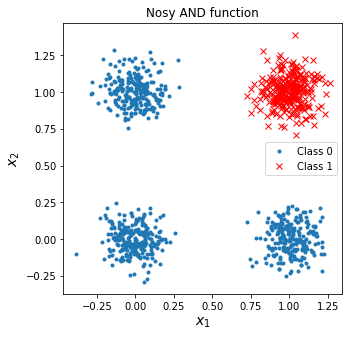

In [14]:
# AND Function
idx0 = np.argwhere(y1 == 0)
idx1 = np.argwhere(y1 == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy AND function')
plt.legend()
plt.savefig('noisy_and_gate.png', dpi=600)
plt.show()

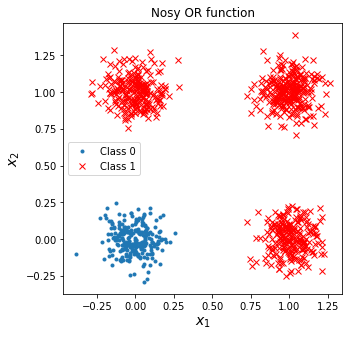

In [15]:
# OR Function
idx0 = np.argwhere(y2 == 0)
idx1 = np.argwhere(y2 == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy OR function')
plt.legend()
plt.savefig('noisy_and_gate.png', dpi=600)
plt.show()

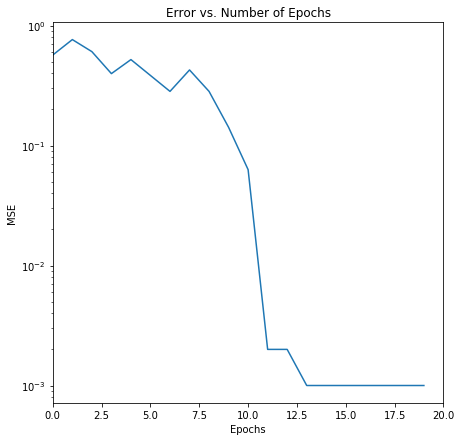

In [16]:
alpha_and = 0.001
error1 = np.zeros(n_epochs)

# AND Function
w_and = np.random.randn(1,3)

for i in range (n_epochs):
    np.random.permutation(X)
    d1 = (np.dot(X,np.transpose(w_and))>=0)
    
    for j in range(N):        
        e1 = d1[j] - y1[j]
        w_and -= alpha_and*e1*X[j]
    
    error1[i] = mean_squared_error(d1, y1)

    
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, n_epochs), error1)
plt.xlim((0, n_epochs))
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Error vs. Number of Epochs')
plt.show()


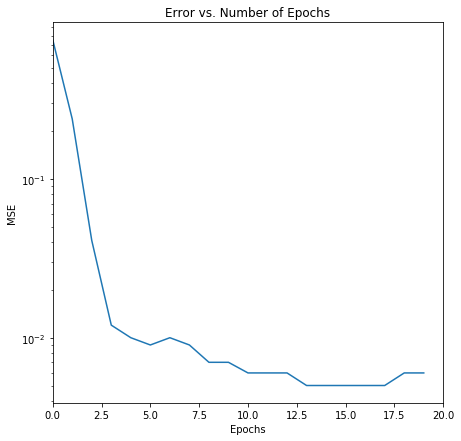

In [20]:
alpha_or = 0.001
error2 = np.zeros(n_epochs)

# OR Function
w_or = np.random.randn(1,3)

for i in range (n_epochs):
    np.random.permutation(X)
    d2 = (np.dot(X,np.transpose(w_or))>=0)
    
    for j in range(N):        
        e2 = d2[j] - y2[j]
        w_or -= alpha_or*e2*X[j]
    error2[i] = mean_squared_error(d2, y2)
    
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, n_epochs), error2)
plt.xlim((0, n_epochs))
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Error vs. Number of Epochs')
plt.show()

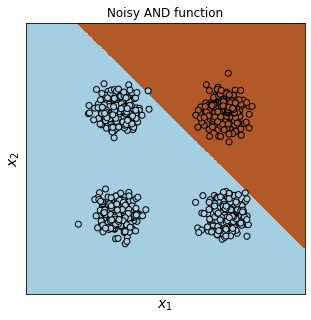

In [21]:
# AND Function
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

d1 = (np.dot(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()],np.transpose(w_and))>=0)

# Put the result into a color plot
Z = d1.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y1, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy AND function')
plt.show()

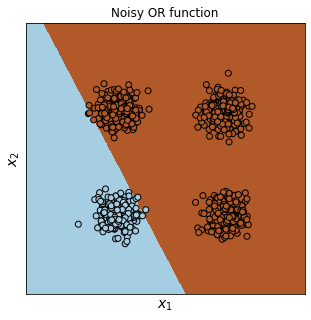

In [22]:
#OR Function
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

d2 = (np.dot(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()],np.transpose(w_or))>=0)

# Put the result into a color plot
Z = d2.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y2, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy OR function')
plt.show()